In [21]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [22]:
n_task_per_file = 50
n_files = 10
base_dir = "proportional/toy_eg_stage1_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [23]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [24]:
new_order = ['Naive', 1.0, 2.5, 5.0, 10.0, 'Tree val']
coverage_df = coverage_df[new_order]
coverage_df

,Naive,1.0,2.5,5.0,10.0,Tree val
0,0.714286,1.000000,1.000000,0.666667,0.500000,0.714286
1,0.500000,0.500000,0.666667,0.666667,0.500000,0.833333
2,0.666667,0.500000,0.833333,0.666667,0.571429,1.000000
3,0.666667,0.500000,0.666667,0.833333,0.833333,1.000000
4,0.500000,0.333333,0.666667,0.500000,0.166667,0.833333
...,...,...,...,...,...,...
37,0.666667,0.833333,1.000000,0.500000,0.333333,1.000000
38,0.666667,1.000000,0.857143,0.571429,0.666667,0.666667
39,0.333333,0.666667,0.714286,0.833333,0.666667,1.000000
40,0.600000,0.800000,0.857143,0.833333,0.333333,1.000000


In [25]:
length_df = length_df[new_order]
length_df

,Naive,1.0,2.5,5.0,10.0,Tree val
0,1.258967,4.179316,3.125898,2.302976,1.704398,25.308622
1,1.166525,5.809461,2.901546,3.210005,9.248222,2.290091
2,1.178633,5.196283,72.877845,4.746664,2.676569,1.871536
3,1.175594,5.604030,2.762122,1.681946,1.966268,8.596456
4,1.148400,5.394371,3.360024,5.662858,1.855337,4.511139
...,...,...,...,...,...,...
37,1.179166,4.933894,2.424336,2.024324,2.523955,2.713043
38,1.168895,5.094725,4.145178,2.239662,1.661400,22.919674
39,1.157148,4.455455,3.695883,3.829215,2.475015,3.204319
40,1.102533,5.476159,3.339618,1.911704,1.525540,1.649764


In [26]:
MSE_df = MSE_df[new_order]
MSE_df

,Naive,1.0,2.5,5.0,10.0,Tree val
0,4.774639,4.754626,5.385438,6.062667,5.715567,4.774639
1,4.747049,5.007723,4.517161,5.284633,5.598432,4.747049
2,4.853868,5.004523,4.477550,4.936360,5.975434,4.853868
3,5.547141,6.023852,5.498041,6.179695,6.447653,5.547141
4,4.162055,3.863381,4.093041,4.473121,4.453665,4.162055
...,...,...,...,...,...,...
37,5.413751,5.418381,5.891855,5.542347,6.000337,5.413751
38,4.423993,4.768245,4.208542,4.757173,5.502178,4.423993
39,5.948403,5.638741,5.234611,5.120518,5.376619,5.948403
40,4.643557,4.488421,5.098815,4.469632,4.851949,4.643557


In [27]:
import seaborn as sns
def boxplots(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key=None, MSE_baseline_key=None,
             col_names=None, palette=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        if col_names is not None:
            df = df.copy()
            df.columns = col_names
        sns.boxplot(data=df, ax=axes[i], palette=palette, showfliers=False)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        new_label = [x if x != "Naive" else r"Naïve" for x in col_names]
        axes[i].set_xticklabels(new_label)
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            if metric == "Coverage":
                axes[i].plot(j, mean, marker='v', color='#40E0D0', markersize=10,)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey', linewidth=1)
        elif metric == "Length":
            axes[i].set_ylim(0,len_lim)
            #if len_baseline_key:
            #    axes[i].axhline(y=means[len_baseline_key], linestyle='dotted', color='grey')
        elif metric == "MSE":
            axes[i].set_ylim(3,7)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey',
                                linewidth=1)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_79154/512556351.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_79154/512556351.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_79154/512556351.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)


Coverage :
 Naive          0.672443
RRT(1)         0.744002
RRT(2.5)       0.758301
RRT(5)         0.721936
RRT(10)        0.603864
Tree-values    0.898868
dtype: float64
Length :
 Naive           1.180114
RRT(1)          5.788420
RRT(2.5)        6.602249
RRT(5)          6.011719
RRT(10)         7.862810
Tree-values    11.697352
dtype: float64
MSE :
 Naive          4.699145
RRT(1)         4.710038
RRT(2.5)       4.909379
RRT(5)         5.147054
RRT(10)        5.440605
Tree-values    4.699145
dtype: float64


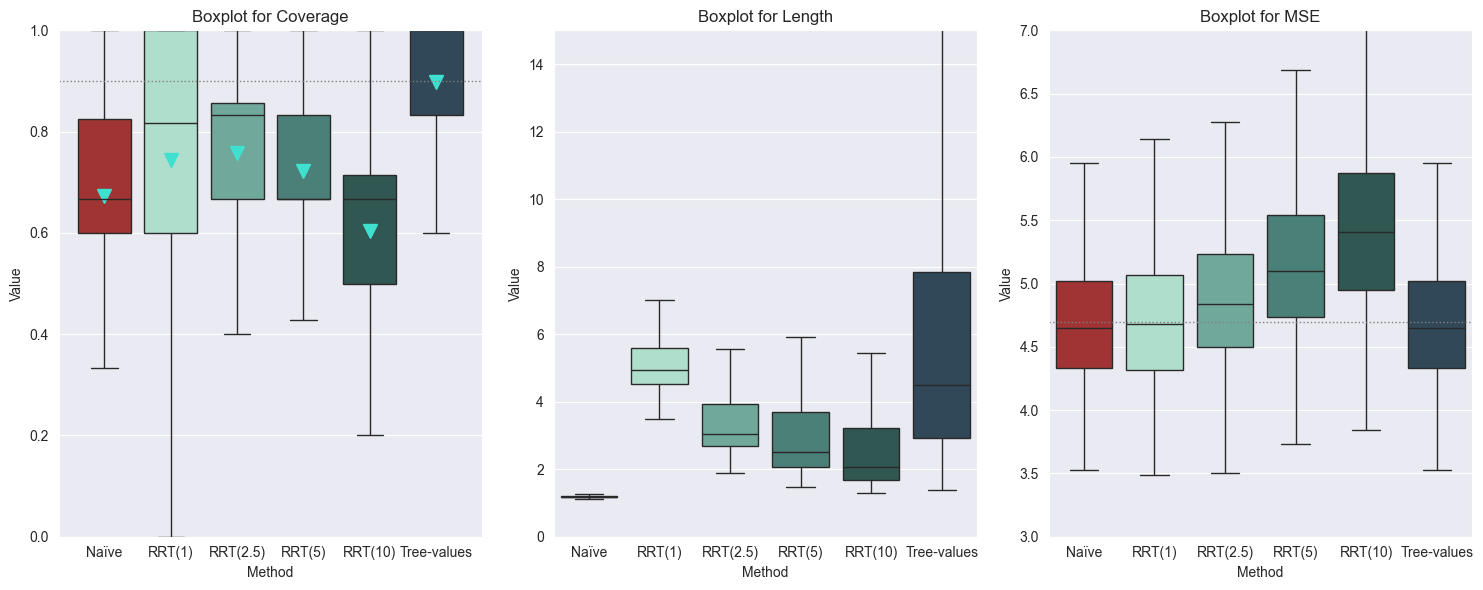

In [28]:
boxplots(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=15,
         len_baseline_key="Naive",
         MSE_baseline_key="Naive",
         metrics=["Coverage", "Length", "MSE"],
         col_names=["Naive", "RRT(1)", "RRT(2.5)", "RRT(5)", "RRT(10)",
                    "Tree-values"], 
         palette=["#B22222", "#A8E6CF", "#66B2A2", "#41897D", "#2A5D57", "#2A4A5D"])